In [1]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

In [25]:
def scrap_nike_reviews(business_url):
    response = requests.get(business_url)

    # Vérifiez si la requête a réussi
    if response.status_code != 200:
        print(f"Erreur lors de la récupération des données : {response.status_code}")
        return

    # Analysez le contenu avec BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraction des commentaires
    comments = [' '.join(review.stripped_strings) for review in soup.find_all('div', class_="styles_reviewContent__0Q2Tg")]

    # Extraction des notes
    notes = [
        rating.find('img')['alt'].split(' ')[1]
        for rating in soup.find_all('div', class_="star-rating_starRating__4rrcf star-rating_medium__iN6Ty")
        if rating.find('img') and 'Noté' in rating.find('img')['alt']
    ]

    # Extraction des pays
    countries_list = [
        country.find('span').get_text(strip=True)
        for country in soup.find_all('div', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua')
    ]

    # Extraction du nombre de notations
    numer_ratings_list = [
        number_rating.get_text(strip=True)
        for number_rating in soup.find_all('span', class_="typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l")
    ]

    return comments, notes, countries_list, numer_ratings_list[3:]


In [24]:
response2 = requests.get('https://fr.trustpilot.com/review/www.nike.com?page=1')

if response2.status_code != 200:
  print("erreur lors de la récupération des données")
else:

  soup2 = BeautifulSoup(response2.content, 'html.parser')

  review1 = soup2.find('div', class_='styles_reviewContent__0Q2Tg')

  print(review1.get_text(strip=True))

  review_text = ' '.join(review1.stripped_strings)
  print(review_text)

  country1 = soup2.find("div", class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua')

  print(country1.get_text(strip=True))

print("hello")



la commande en ligne confiée au transporteur UPS a dû être annuléela commande en ligne pour ma fille confiée au transporteur UPS est une catastrophe à cause du transporteur incapable de trouver le point relais notoirement connu dans Paris 8ème; total commande annulée par le service Tchat et promo perdue. Service Tchat lent, robot au début de nature à dissuader les plus courageux. J'ai racheté mes Nike sur un site alternatif et perdu de l'argent. Indigne d'une grande marqueDate de l'expérience:26 novembre 2024
la commande en ligne confiée au transporteur UPS a dû être annulée la commande en ligne pour ma fille confiée au transporteur UPS est une catastrophe à cause du transporteur incapable de trouver le point relais notoirement connu dans Paris 8ème; total commande annulée par le service Tchat et promo perdue. Service Tchat lent, robot au début de nature à dissuader les plus courageux. J'ai racheté mes Nike sur un site alternatif et perdu de l'argent. Indigne d'une grande marque Date d

In [26]:
def data_to_dataframe():
    all_reviews = []
    all_notes = []
    all_countries = []
    all_number_ratings = []

    # Itérer sur plusieurs pages
    for page in range(1, 42):
        business_url = f'https://fr.trustpilot.com/review/www.nike.com?page={page}'
        reviews, notes, countries, number_ratings = scrap_nike_reviews(business_url)

        # Ajouter les données de cette page à la liste globale
        all_reviews.extend(reviews)
        all_notes.extend(notes)
        all_countries.extend(countries)
        all_number_ratings.extend(number_ratings)

    # Créer un DataFrame avec les listes collectées
    df = pd.DataFrame({
        'Review': all_reviews,
        'Rating': all_notes,
        'Country': all_countries,
        'user_avis': all_number_ratings
    })

    return df

In [36]:
df = data_to_dataframe()

In [37]:
df

,Review,Rating,Country,user_avis
0,la commande en ligne confiée au transporteur U...,1,FR,1avis
1,l’expérience d’achat… l’enfer Très dommage que...,1,FR,11avis
2,"Bon SAV Après plusieurs commandes sans soucis,...",5,FR,4avis
3,2 commandes et 2 retours problématiques… 2 com...,1,FR,1avis
4,Vol des produits retour Une politique de retou...,1,FR,5avis
...,...,...,...,...
814,Excellent customer service and shop staff Cust...,5,FR,3avis
815,Commande reçue très rapidement Commandé sur le...,5,FR,13avis
816,Des articles personnalisés Quand je peux me le...,4,NL,9avis
817,parfait tout est très bien. on se ballade faci...,5,FR,3avis


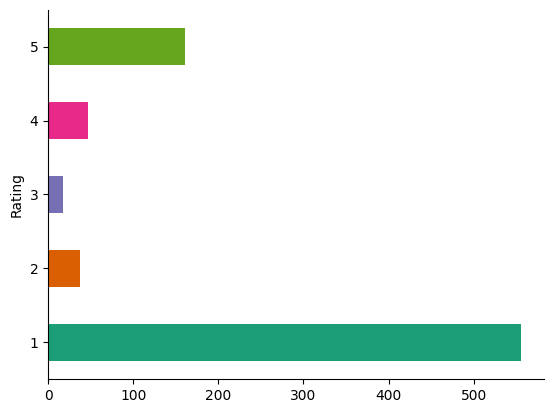

In [11]:
# @title Rating

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
df['Date'] = df['Review'].apply(lambda x : x[x.find("Date de l'expérience") + len("Date de l'expérience") + 2:])
df['Review'] = df['Review'].apply(lambda x : x[:x.find("Date de l'expérience")])

In [39]:
df

,Review,Rating,Country,user_avis,Date
0,la commande en ligne confiée au transporteur U...,1,FR,1avis,26 novembre 2024
1,l’expérience d’achat… l’enfer Très dommage que...,1,FR,11avis,21 novembre 2024
2,"Bon SAV Après plusieurs commandes sans soucis,...",5,FR,4avis,15 novembre 2024
3,2 commandes et 2 retours problématiques… 2 com...,1,FR,1avis,03 octobre 2024
4,Vol des produits retour Une politique de retou...,1,FR,5avis,31 octobre 2024
...,...,...,...,...,...
814,Excellent customer service and shop staff Cust...,5,FR,3avis,31 juillet 2016
815,Commande reçue très rapidement Commandé sur le...,5,FR,13avis,26 mars 2016
816,Des articles personnalisés Quand je peux me le...,4,NL,9avis,02 juillet 2015
817,parfait tout est très bien. on se ballade faci...,5,FR,3avis,21 novembre 2014


In [40]:
df.to_csv('avis_nike.csv', index=False)